In [17]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

all_o3_df = pd.read_csv("./Resources/all_years_o3.csv")
#turn date column elements into datetime objects
all_o3_df["Date"] = pd.to_datetime(all_o3_df["Date"])
all_o3_df = all_o3_df.set_index("Date")

all_pm25_df = pd.read_csv("./Resources/all_years_pm25.csv")
#turn date column elements into datetime objects
all_pm25_df["Date"] = pd.to_datetime(all_pm25_df["Date"])
all_pm25_df = all_pm25_df.set_index("Date")
all_pm25_df.head()

,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2017-01-01,IN,New Delhi,pm25,24,54.9,282.7,177.7
2017-01-01,CN,Shanghai,pm25,215,12.0,63.2,34.4
2017-01-01,US,Jacksonville,pm25,115,3.1,113.6,8.1
2017-01-01,US,Los Angeles,pm25,69,3.3,109.7,15.9
2017-01-01,US,Manhattan,pm25,96,4.3,23.0,12.1


In [18]:
#select date range to measure PM2.5 for full shutdown - include all years
#messy right now - turn into a function!

#use Wuhan as an example
earliest_year = min(all_pm25_df.index.year)
latest_year = max(all_pm25_df.index.year)
shutdown_start_date = (3, 24)#"1/23"
shutdown_end_date = (5, 3)#"4/8"
mask = ((pd.Series(map(lambda x: x.month <= shutdown_start_date[0], all_pm25_df.index.date), index=all_pm25_df.index)) &
                                            ((pd.Series(map(lambda x: x.day < shutdown_start_date[1], all_pm25_df.index.date), index=all_pm25_df.index))))
#first get dates after the start date for all years
shutdown_time_period_pm_df = all_pm25_df.loc[~mask, :]

#remove the later months
shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df.index.month<=shutdown_end_date[0]]

#now get dates before the end date
mask2 = ((pd.Series(map(lambda x: x.month == shutdown_end_date[0], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index)) &
                                            ((pd.Series(map(lambda x: x.day >= shutdown_end_date[1], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index))))

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[~mask2, :]

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df["City"] == "New Delhi"]
print(shutdown_time_period_pm_df.head())
shutdown_time_period_pm_df.tail(10)

           Country       City Specie  count  min (ug/m3)  max (ug/m3)  \
Date                                                                    
2017-01-24      IN  New Delhi   pm25     24        100.0        359.5   
2017-01-25      IN  New Delhi   pm25     24        107.7        301.9   
2017-01-26      IN  New Delhi   pm25     24         30.1        177.7   
2017-01-27      IN  New Delhi   pm25     24         13.0        136.8   
2017-01-28      IN  New Delhi   pm25     13         90.3        187.8   

            median (ug/m3)  
Date                        
2017-01-24           192.8  
2017-01-25           188.8  
2017-01-26           136.8  
2017-01-27            48.0  
2017-01-28           101.9  


,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2020-04-23,IN,New Delhi,pm25,24,6.0,96.1,48.0
2020-04-24,IN,New Delhi,pm25,24,29.2,92.2,48.9
2020-04-25,IN,New Delhi,pm25,24,6.0,55.5,18.7
2020-04-26,IN,New Delhi,pm25,24,10.0,80.6,23.9
2020-04-27,IN,New Delhi,pm25,24,15.9,37.9,25.8
2020-04-28,IN,New Delhi,pm25,24,23.0,65.1,36.7
2020-04-29,IN,New Delhi,pm25,24,33.9,74.8,52.9
2020-04-30,IN,New Delhi,pm25,24,35.9,69.0,48.9
2020-05-01,IN,New Delhi,pm25,24,37.9,74.8,55.5


In [19]:
#inputs for the function are the complete dataframe for one particulate (df), the city name (city), an integer tuple in the 
#form of (month, day) for the shutdown date (shutdown_date, for example (1, 23) for 1/23) - NOTE that this is the 
#date where the strictest lockdown regulations start for that city, and an integer tuple in the 
#form of (month, day) for the reopen date (reopen_date, for example (4, 8) for 4/8) - NOTE that this is the date when the city 
#begins to reopen from the strictest lockdown regulations
#
#returns a dataframe with the correct shutdown date ranges for all years in the data set
def shutdownData(df, city, shutdown_date, reopen_date):

    mask = ((pd.Series(map(lambda x: x.month <= shutdown_date[0], df.index.date), index=df.index)) &
                                                ((pd.Series(map(lambda x: x.day < shutdown_date[1], df.index.date), index=df.index))))
    #first get dates after the start date for all years
    shutdown_time_period_df = df.loc[~mask, :]

    #remove the later months
    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df.index.month<=reopen_date[0]]

    #now get dates before the end date
    mask2 = ((pd.Series(map(lambda x: x.month == reopen_date[0], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index)) &
                                                ((pd.Series(map(lambda x: x.day >= reopen_date[1], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index))))

    shutdown_time_period_df = shutdown_time_period_df.loc[~mask2, :]

    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df["City"] == city]
    
    return shutdown_time_period_df

test_df = shutdownData(all_pm25_df, "New Delhi", (3, 24), (5, 3))

print("The 'shutdownData' function is working correctly:", test_df.equals(shutdown_time_period_pm_df))

The 'shutdownData' function is working correctly: True


In [20]:
#so to get the ozone information for Wuhan between the shutdown date of 1/23 and the reopening date of 4/8, we 
#need to call the function as follows:
newdelhi_o3_shutdown_df = shutdownData(all_o3_df, "New Delhi", (3, 24), (5, 3))
newdelhi_o3_shutdown_df

,Country,City,Specie,count,min (ppb),max (ppb),median (ppb)
Date,,,,,,,


In [38]:
#get average of medians by year
bar_plot_info = shutdown_time_period_pm_df.groupby(shutdown_time_period_pm_df.index.year).mean()
bar_plot_info

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,21.865385,34.759615,180.434615,78.136538
2018,23.905660,39.641509,183.998011,82.400000
2019,23.851064,36.342553,182.879587,78.680851
2020,23.981481,24.953704,116.192593,52.925926


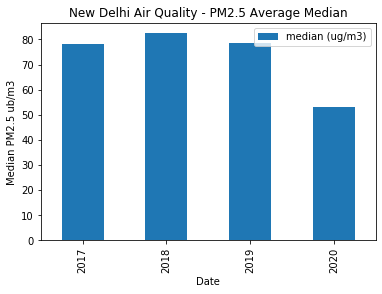

In [44]:
#plot of average medians
bar_plot_info.plot(kind="bar", y="median (ug/m3)")
plt.ylabel("Median PM2.5 ub/m3")
plt.title("New Delhi Air Quality - PM2.5 Average Median")
plt.savefig("./outputs/NewDelhi_pm25median.png")

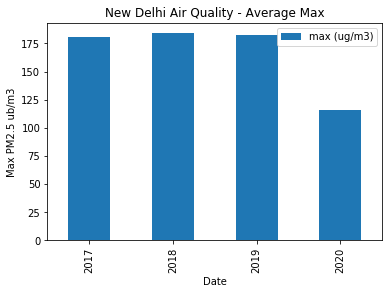

In [40]:
#plot of average maximums
bar_plot_info.plot(kind="bar", y="max (ug/m3)")
plt.ylabel("Max PM2.5 ub/m3")
plt.title("New Delhi Air Quality - Average Max")
plt.savefig("./outputs/NewDelhi_pm25max.png")

In [41]:
#get percentage decrease year over year
bar_plot_info.pct_change()

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,NaN,NaN,NaN,NaN
2018,0.093311,0.140447,0.019749,0.054564
2019,-0.002284,-0.083220,-0.006078,-0.045135
2020,0.005468,-0.313375,-0.364650,-0.327334


In [42]:
#combine three previous years into an average median value
prior_years_df = bar_plot_info.loc[bar_plot_info.index<2020]
prior_averages = prior_years_df.mean()
prior_averages

count              23.207370
min (ug/m3)        36.914559
max (ug/m3)       182.437405
median (ug/m3)     79.739130
dtype: float64

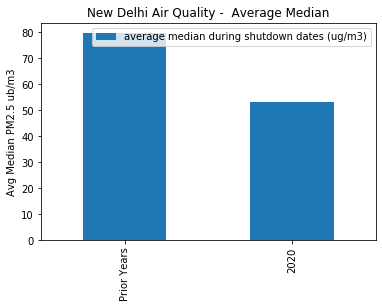

In [43]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ug/m3)":[prior_averages["median (ug/m3)"], 
                                                                                 bar_plot_info["median (ug/m3)"][2020]]}, 
                                index=["Prior Years", "2020"])

summary_bar_plot.plot(kind="bar")
summary_bar_plot.pct_change()
plt.ylabel("Avg Median PM2.5 ub/m3")
plt.title("New Delhi Air Quality -  Average Median")
plt.savefig("./outputs/NewDelhi_3yearMedianchange.png")